# Assignment CIE 5703 - week 6

#### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

## Charlotte rain gauge dataset 15 min data from 2003 - 2014

Show the data source locations. Red dots are available gauges, blue cross denotes the selected station. No specific criteria was chosen to select that specific station.

#### Plot the positions of gauges. Optional code! Requires additional sources. Not easily copy-paste-able!

In [2]:
from mpl_toolkits.basemap import Basemap

In [3]:
def get_basemap(_resolution):
    return Basemap(projection='merc', llcrnrlat=25, urcrnrlat=38, llcrnrlon=275, urcrnrlon=285, lat_ts=35.,
                   resolution=_resolution)

In [4]:
positions = pd.read_csv('./Raw_RG_Data/RG_lat_lon.csv', header=None)
positions.columns=['lat', 'lon']

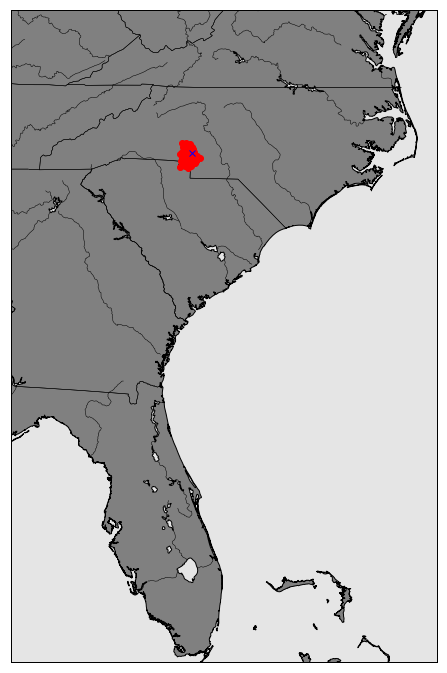

In [5]:
plt.figure(figsize=(24,12))
m = get_basemap('h')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color = 'gray')
m.drawmapboundary()
for index, row in positions.iterrows():
    x,y = m(row['lon']+360, row['lat'])
    m.plot(x, y, 'ro', markersize=6)
x,y = m(positions['lon'][0]+360, positions['lat'][0])
m.plot(x, y, 'bx', markersize=6)
m.drawstates()
m.drawrivers()
plt.show()

#### Read in data

In [6]:
charlotte_rainfall = pd.read_csv('./charlotte_rg_2003-2014.csv', header = None)

In [7]:
#charlotte_rainfall = pd.read_csv('./Raw_RG_Data/Charlotte_CRN_gage_2003.csv', header = None)
#for i in range(2004,2014):
#    cur_rainfall = pd.read_csv('./Raw_RG_Data/Charlotte_CRN_gage_%d.csv' % i, header = None)
#    charlotte_rainfall = charlotte_rainfall.append(cur_rainfall, ignore_index=True)

#### Format data to year, month, day, hour, min and rainfall & select only ONE rain gauge

In [8]:
#charlotte_rainfall = charlotte_rainfall.iloc[:,:6]
charlotte_rainfall.columns = ["year","month","day", "hour", "min", "Rainfall"]
charlotte_rainfall.loc[:,'dt'] = pd.to_datetime(dict(year=charlotte_rainfall['year'], month=charlotte_rainfall['month'], day=charlotte_rainfall['day'], hour=charlotte_rainfall['hour'], minute=charlotte_rainfall['min']))
charlotte_rainfall.index=charlotte_rainfall['dt']

In [9]:
charlotte_rainfall.head()

,year,month,day,hour,min,Rainfall,dt
dt,,,,,,,
2003-01-01 00:00:00,2003,1,1,0,0,0.0,2003-01-01 00:00:00
2003-01-01 00:15:00,2003,1,1,0,15,0.0,2003-01-01 00:15:00
2003-01-01 00:30:00,2003,1,1,0,30,0.0,2003-01-01 00:30:00
2003-01-01 00:45:00,2003,1,1,0,45,0.0,2003-01-01 00:45:00
2003-01-01 01:00:00,2003,1,1,1,0,0.0,2003-01-01 01:00:00


#### Plot rain data as read

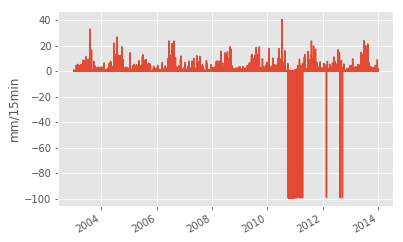

In [10]:
plt.plot(charlotte_rainfall['dt'], charlotte_rainfall["Rainfall"])
plt.ylabel('mm/15min')
plt.gcf().autofmt_xdate()

#### Replace invalid data with NaNs and plot again

In [11]:
charlotte_rainfall["Rainfall"] = charlotte_rainfall["Rainfall"].replace(-99, np.nan)

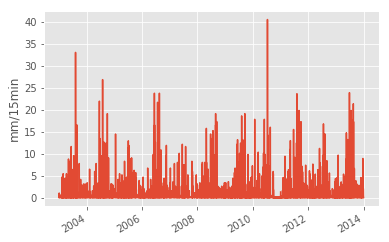

In [12]:
plt.plot(charlotte_rainfall['dt'], charlotte_rainfall["Rainfall"])
plt.ylabel('mm/15min')
plt.gcf().autofmt_xdate()

In [13]:
charlotte_rainfall.head()

,year,month,day,hour,min,Rainfall,dt
dt,,,,,,,
2003-01-01 00:00:00,2003,1,1,0,0,0.0,2003-01-01 00:00:00
2003-01-01 00:15:00,2003,1,1,0,15,0.0,2003-01-01 00:15:00
2003-01-01 00:30:00,2003,1,1,0,30,0.0,2003-01-01 00:30:00
2003-01-01 00:45:00,2003,1,1,0,45,0.0,2003-01-01 00:45:00
2003-01-01 01:00:00,2003,1,1,1,0,0.0,2003-01-01 01:00:00


#### Resample the 10-min dataset to 24h accumulated rainfall data

In [14]:
charlotte_24h_rainfall = pd.DataFrame()
charlotte_24h_rainfall['mean_rain'] = charlotte_rainfall.Rainfall.resample('D').mean()
charlotte_24h_rainfall['accum_rain'] = charlotte_rainfall.Rainfall.resample('D').sum()

In [15]:
charlotte_24h_rainfall.head()

,mean_rain,accum_rain
dt,,
2003-01-01,0.040349,3.87350
2003-01-02,0.000000,0.00000
2003-01-03,0.035004,3.36042
2003-01-04,0.000000,0.00000
2003-01-05,0.000000,0.00000


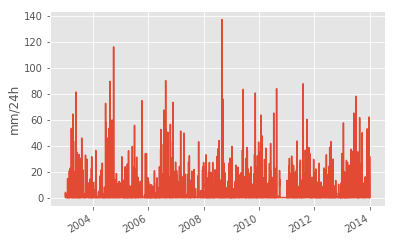

In [16]:
plt.plot(charlotte_24h_rainfall["accum_rain"])
plt.ylabel('mm/24h')
plt.gcf().autofmt_xdate()

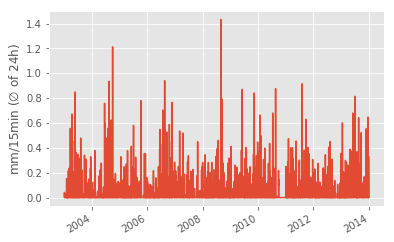

In [17]:
plt.plot(charlotte_24h_rainfall["mean_rain"])
plt.ylabel(r'mm/15min ($\varnothing$ of 24h)')
plt.gcf().autofmt_xdate()

#### Resample 15 min data to 1h accumulated dataset

In [18]:
charlotte_1h_rainfall = pd.DataFrame()
charlotte_1h_rainfall['mean_rain'] = charlotte_rainfall.Rainfall.resample('H').mean()
charlotte_1h_rainfall['accum_rain'] = charlotte_rainfall.Rainfall.resample('H').sum()

In [19]:
charlotte_1h_rainfall.head()

,mean_rain,accum_rain
dt,,
2003-01-01 00:00:00,0.00000,0.00000
2003-01-01 01:00:00,0.00000,0.00000
2003-01-01 02:00:00,0.00000,0.00000
2003-01-01 03:00:00,0.06477,0.25908
2003-01-01 04:00:00,0.00000,0.00000


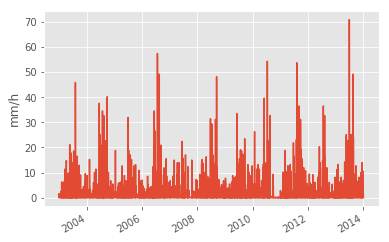

In [20]:
plt.plot(charlotte_1h_rainfall["accum_rain"])
plt.ylabel('mm/h')
plt.gcf().autofmt_xdate()

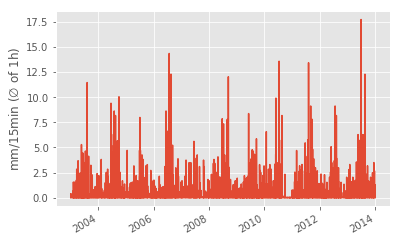

In [21]:
plt.plot(charlotte_1h_rainfall["mean_rain"])
plt.ylabel(r'mm/15min ($\varnothing$ of 1h)')
plt.gcf().autofmt_xdate()

#### Select only summer months (April - Sept)

In [22]:
charlotte_summer_1h_rainfall = charlotte_1h_rainfall.loc[(charlotte_1h_rainfall.index.month>=4) & (charlotte_1h_rainfall.index.month<=9)]

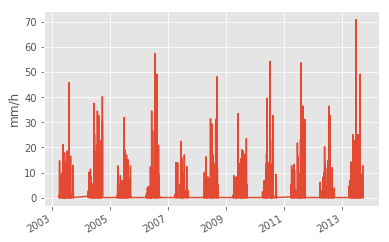

In [23]:
plt.plot(charlotte_summer_1h_rainfall["accum_rain"])
plt.ylabel('mm/h')
plt.gcf().autofmt_xdate()

#### Select only winter months (Oct - Mar)

In [24]:
mask_start = (charlotte_1h_rainfall.index.month >= 1) & (charlotte_1h_rainfall.index.month <= 3)
mask_end = (charlotte_1h_rainfall.index.month >= 10) & (charlotte_1h_rainfall.index.month <= 12)
mask = mask_start | mask_end

In [25]:
charlotte_winter_1h_rainfall = charlotte_1h_rainfall.loc[mask]

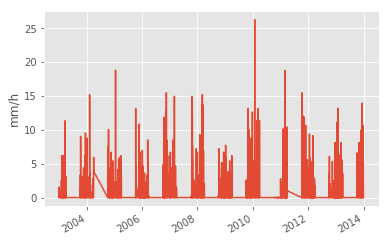

In [26]:
plt.plot(charlotte_winter_1h_rainfall["accum_rain"])
plt.ylabel('mm/h')
plt.gcf().autofmt_xdate()

In [27]:
charlotte_winter_1h_rainfall.head()

,mean_rain,accum_rain
dt,,
2003-01-01 00:00:00,0.00000,0.00000
2003-01-01 01:00:00,0.00000,0.00000
2003-01-01 02:00:00,0.00000,0.00000
2003-01-01 03:00:00,0.06477,0.25908
2003-01-01 04:00:00,0.00000,0.00000


#### Resample 15 min dataset to monthly accumulated dataset

In [28]:
charlotte_monthly_rainfall = pd.DataFrame()
charlotte_monthly_rainfall['mean_rain'] = charlotte_rainfall.Rainfall.resample('M').mean()
charlotte_monthly_rainfall['accum_rain'] = charlotte_rainfall.Rainfall.resample('M').sum()

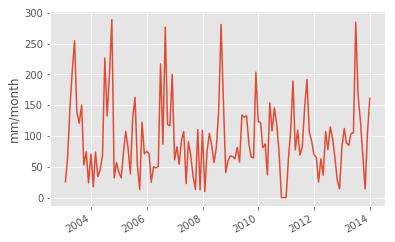

In [29]:
plt.plot(charlotte_monthly_rainfall["accum_rain"])
plt.ylabel('mm/month')
plt.gcf().autofmt_xdate()

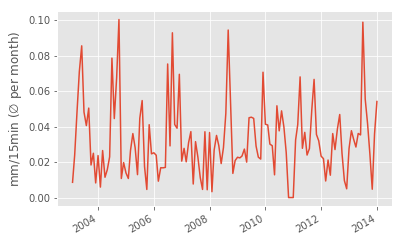

In [30]:
plt.plot(charlotte_monthly_rainfall["mean_rain"])
plt.ylabel(r'mm/15min ($\varnothing$ per month)')
plt.gcf().autofmt_xdate()

## Answering the assignments

### 1. General statistics for 24-hour and 15-min datasets: compute mean, standard deviation, skewness; plot histograms

#### 15 min dataset

Mean, standard deviation and skewness of the 15 min dataset

In [31]:
print('Mean: %s' % str(charlotte_rainfall.Rainfall.mean()))
print('Std: %s' % str(charlotte_rainfall.Rainfall.std()))
print('Skew: %s' % str(charlotte_rainfall.Rainfall.skew()))

Mean: 0.0324416325081
Std: 0.371849611873
Skew: 31.4741563106


Histogram of the data

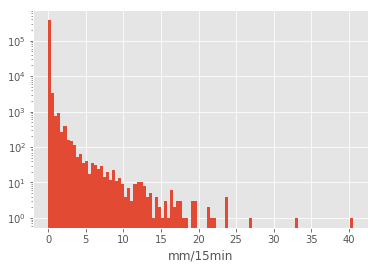

In [32]:
charlotte_rainfall.Rainfall.hist(bins = 100)
plt.xlabel('mm/15min')
plt.gca().set_yscale("log")

Histogram of the data without zeros

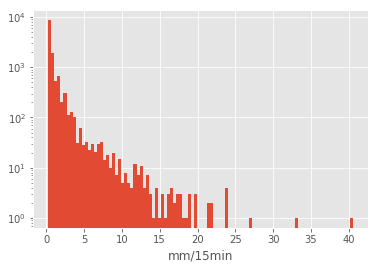

In [33]:
cur_data = charlotte_rainfall.Rainfall.loc[charlotte_rainfall.Rainfall>0]
hist_d = plt.hist(cur_data, bins=100)
plt.xlabel('mm/15min')
plt.gca().set_yscale("log")

#### 24h accumulated dataset

Mean, standard deviation and skewness of 24h accumulated dataset

In [34]:
print('Mean: %s' % str(charlotte_24h_rainfall.accum_rain.mean()))
print('Std: %s' % str(charlotte_24h_rainfall.accum_rain.std()))
print('Skew: %s' % str(charlotte_24h_rainfall.accum_rain.skew()))

Mean: 3.10561906477
Std: 9.45525374197
Skew: 5.33938900456


Histogram of the dataset

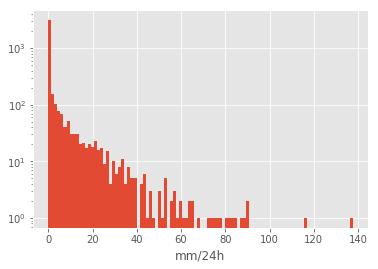

In [35]:
charlotte_24h_rainfall.accum_rain.hist(bins = 100)
plt.xlabel('mm/24h')
plt.gca().set_yscale("log")

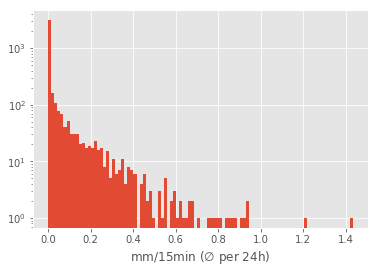

In [36]:
charlotte_24h_rainfall.mean_rain.hist(bins = 100)
plt.xlabel(r'mm/15min ($\varnothing$ per 24h)')
plt.gca().set_yscale("log")

Histogram without zeros

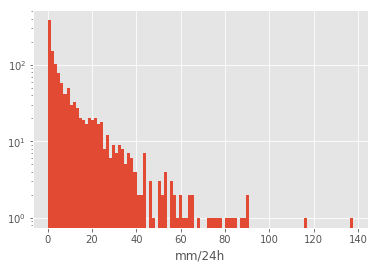

In [37]:
cur_data = charlotte_24h_rainfall.accum_rain.loc[charlotte_24h_rainfall.accum_rain>0]
hist_d = plt.hist(cur_data, bins=100)
plt.xlabel('mm/24h')
plt.gca().set_yscale("log")

### 2. a. Analysis of seasonal cycles: create boxplots for monthly totals across all years

Boxplot of monthly totals

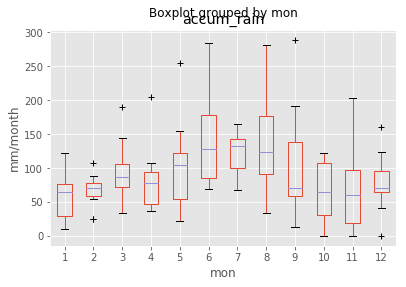

In [38]:
charlotte_monthly_rainfall['mon'] = charlotte_monthly_rainfall.index.month
charlotte_monthly_rainfall['year'] = charlotte_monthly_rainfall.index.year
charlotte_monthly_rainfall.boxplot(column=['accum_rain'], by='mon', sym='+')
plt.ylabel('mm/month')

Or on a yearly scale:

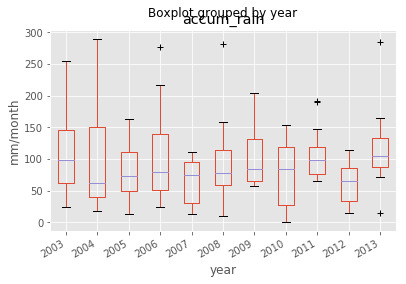

In [39]:
charlotte_monthly_rainfall.dropna().boxplot(column=['accum_rain'], by='year', sym='+')
plt.ylabel('mm/month')
plt.gcf().autofmt_xdate()

### 2. b. Analysis of diurnal cycles: create boxplots for hourly totals for entire dataseries

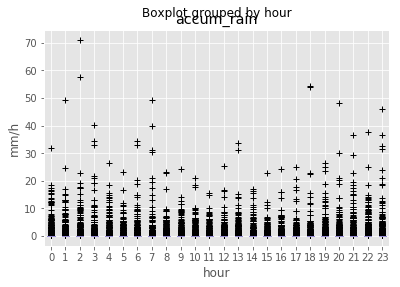

In [40]:
charlotte_1h_rainfall['hour'] = charlotte_1h_rainfall.index.hour
charlotte_1h_rainfall.boxplot(column=['accum_rain'], by='hour', sym='+')
plt.ylabel('mm/h')

Neglecting events < 1mm/h

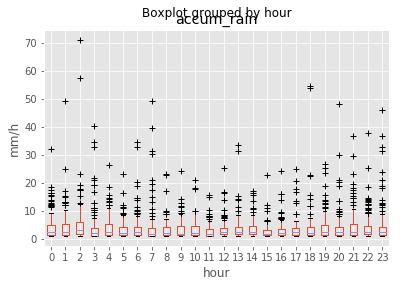

In [41]:
cur_df = charlotte_1h_rainfall.copy()
cur_df.loc[cur_df.accum_rain<1, 'accum_rain'] = np.nan
cur_df.boxplot(column=['accum_rain'], by='hour', sym='+')
plt.ylabel('mm/h')

Neglecting events < 3mm/h

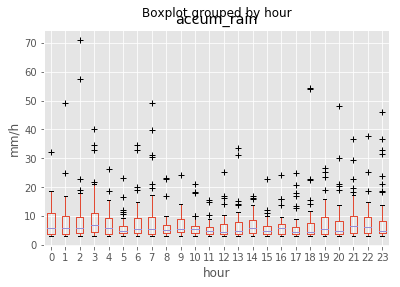

In [42]:
cur_df = charlotte_1h_rainfall.copy()
cur_df.loc[cur_df.accum_rain<3, 'accum_rain'] = np.nan
cur_df.boxplot(column=['accum_rain'], by='hour', sym='+')
plt.ylabel('mm/h')

### 2. c. Variation of diurnal cycles with seasons: create boxplots for hourly totals for summer season (April – September) and for winter season (October-March)

Merge summer hourly data

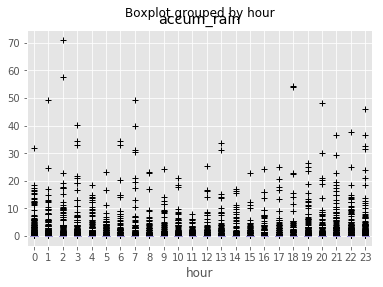

In [43]:
pd.options.mode.chained_assignment = None  # default='warn'
charlotte_summer_1h_rainfall['hour'] = charlotte_summer_1h_rainfall.index.hour
charlotte_summer_1h_rainfall.boxplot(column=['accum_rain'], by='hour', sym='+')

Neglecting events <1mm/hour

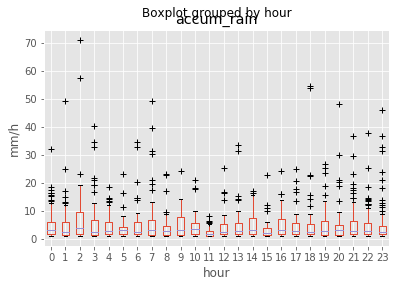

In [44]:
cur_df = charlotte_summer_1h_rainfall.copy()
cur_df.loc[cur_df.accum_rain<1, 'accum_rain'] = np.nan
cur_df.boxplot(column=['accum_rain'], by='hour', sym='+')
plt.ylabel('mm/h')

Neglecting events <3mm/hour

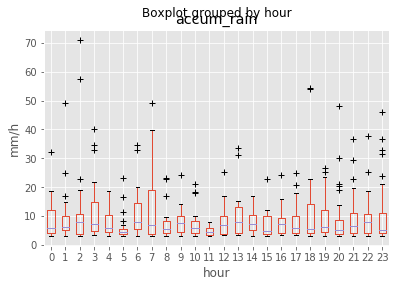

In [45]:
cur_df = charlotte_summer_1h_rainfall.copy()
cur_df.loc[cur_df.accum_rain<3, 'accum_rain'] = np.nan
cur_df.boxplot(column=['accum_rain'], by='hour', sym='+')
plt.ylabel('mm/h')

Merge hourly winter data

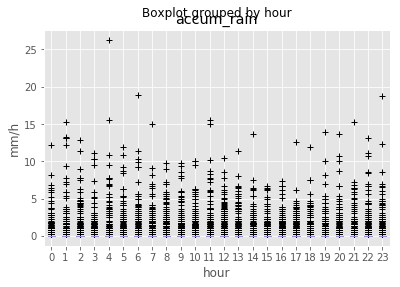

In [46]:
charlotte_winter_1h_rainfall['hour'] = charlotte_winter_1h_rainfall.index.hour
charlotte_winter_1h_rainfall.boxplot(column=['accum_rain'], by='hour', sym='+')
plt.ylabel('mm/h')

Neglecting events <1mm/h

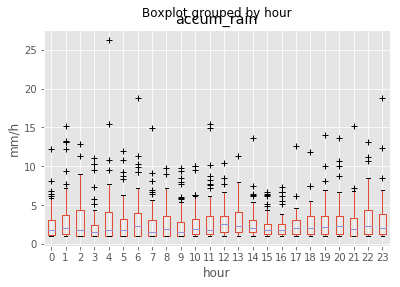

In [47]:
cur_df = charlotte_winter_1h_rainfall.copy()
cur_df.loc[cur_df.accum_rain<1, 'accum_rain'] = np.nan
cur_df.boxplot(column=['accum_rain'], by='hour', sym='+')
plt.ylabel('mm/h')

Neglecting events <3mm/h

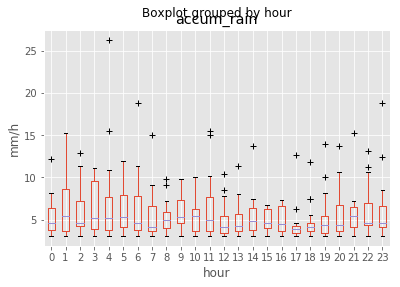

In [48]:
cur_df = charlotte_winter_1h_rainfall.copy()
cur_df.loc[cur_df.accum_rain<3, 'accum_rain'] = np.nan
cur_df.boxplot(column=['accum_rain'], by='hour', sym='+')
plt.ylabel('mm/h')

### 2. d. Diurnal cycles of intense storm events: Count nr of exceedances above 10 mm/h threshold for each hour of the day, for entire data series and for summer months only

Show rainfall events > 10mm /h over entire 1h accumulated dataset

In [49]:
charlotte_1h_exceeds = charlotte_1h_rainfall.accum_rain[charlotte_1h_rainfall.accum_rain>10]

Amount of hourly events

In [50]:
print(len(charlotte_1h_exceeds))

215


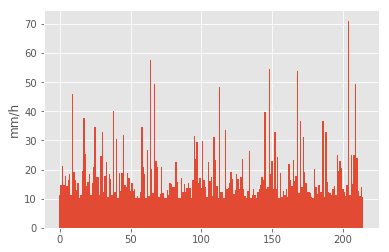

In [51]:
y = np.array(charlotte_1h_exceeds)
N = len(y)
x = range(N)
width = 1
plt.bar(x, y, width)
plt.ylabel('mm/h')

10 mm/h events in summer periods

In [52]:
charlotte_1h_exceeds_summer = charlotte_summer_1h_rainfall.accum_rain[charlotte_summer_1h_rainfall.accum_rain>10]

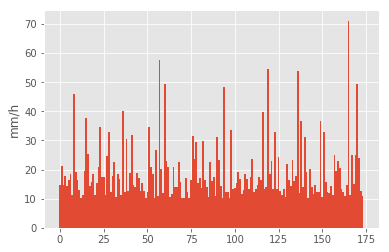

In [53]:
y = np.array(charlotte_1h_exceeds_summer)
N = len(y)
x = range(N)
width = 1
plt.bar(x, y, width)
plt.ylabel('mm/h')

Amount of hourly events

In [54]:
print(len(charlotte_1h_exceeds_summer))

174


#### 3. Fit GEV-distribution for POT values in the time series

#### 3. a. Create plots: histogram and GEV fit and interpret

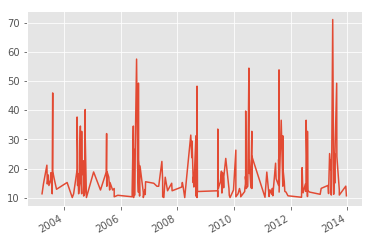

In [55]:
plt.plot(charlotte_1h_exceeds)
plt.gcf().autofmt_xdate()

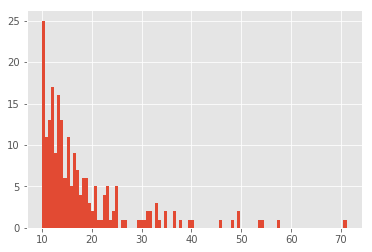

In [56]:
charlotte_1h_exceeds.hist(bins=100)

In [57]:
from scipy.stats import genextreme

In [58]:
x = np.linspace(0, 80, 1000)
y = np.array(charlotte_1h_exceeds[:])

In [59]:
np.seterr(divide='ignore', invalid='ignore')
genextreme.fit(y)

(-0.62474304788277579, 13.036625077501196, 3.3578693595774602)

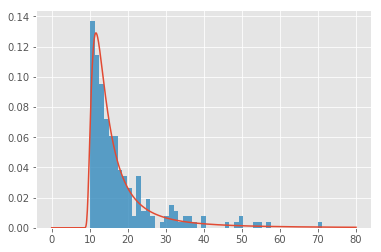

In [60]:
pdf = plt.plot(x, genextreme.pdf(x, *genextreme.fit(y)))
pdf_hist = plt.hist(y, bins=50, normed=True, histtype='stepfilled', alpha=0.8)

#### 3. c. Compute rainfall amounts associated with return periods of 1 year, 10 years and 100 years

In [61]:
genextreme.ppf((1-1/1), *genextreme.fit(y))

7.6618243959135919

In [62]:
genextreme.ppf((1-1/10), *genextreme.fit(y))

29.586721249852754

In [63]:
genextreme.ppf((1-1/100), *genextreme.fit(y))

102.82877647306273

### Update 10.10.2017

##### Block maxima & GEV

In [64]:
from scipy.stats import genpareto

In [65]:
temp_monthly = charlotte_1h_rainfall.groupby(pd.TimeGrouper(freq='M'))
block_max_y = np.array(temp_monthly.accum_rain.max())
print(block_max_y)

[  2.58064   6.19506  11.3538   14.71168  21.16074  17.80794  18.5801
  45.9359   12.9032    9.03224   4.38658   9.5504    8.77316  15.22476
   5.93598  10.06602  11.3538   37.67836  34.57956  32.77362  40.25646
  10.06602   6.70814   5.42036  18.83918   5.67944   6.19506  12.64666
   8.77316  18.83918  31.99892  15.22476  12.64412  13.16228  10.84072
   6.71068   6.96722   2.32156   8.51662   4.13004  12.39012  34.57956
  57.54878  49.29124  20.9042   11.86942  15.48638   6.19252   6.71068
   8.51662  14.96822  13.93698  13.93444  22.45106  17.03324  12.38758
   2.83972  14.96822   2.58064   7.22884   3.35534  13.67536  15.2273
  16.25854   8.25754  31.4833   29.42082  31.22422  48.25492   7.22376
   5.16128   6.70814   7.74192   5.41782   6.19252   8.77316   8.51662
  33.54832  19.09572  18.5801   23.4823   13.16228  10.83564  12.64666
  26.32202  11.35634  13.16228   6.71068  17.28978  39.74084  54.45252
  32.77362   9.29132   0.        0.        0.        2.794    18.796
  10.414  

In [66]:
print(len(block_max_y))

132


In [67]:
x = np.linspace(0, 100, 1000)

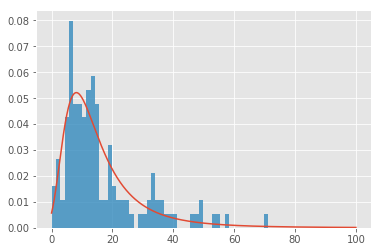

In [68]:
pdf = plt.plot(x, genextreme.pdf(x, *genextreme.fit(block_max_y)))
pdf_hist = plt.hist(block_max_y, bins=50, normed=True, histtype='stepfilled', alpha=0.8)

GEV and block maxima of monthly maxima of 1h data

In [69]:
genextreme.fit(block_max_y)

(-0.26480921969966315, 9.8105732107407846, 7.2846568102073874)

In [70]:
genextreme.ppf((1-1/10), *genextreme.fit(block_max_y))

32.222109726882401

#### POT & GPD

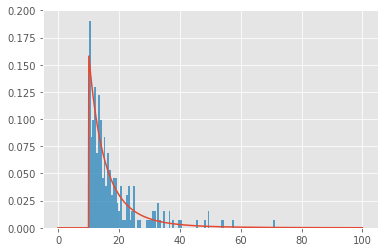

In [71]:
pdf_bm = plt.plot(x, genpareto.pdf(x, *genpareto.fit(y)))
pdf_hist_bm = plt.hist(y, bins=100, normed=True, histtype='stepfilled', alpha=0.8)

GPD and POT of data>10mm/h

In [72]:
genpareto.fit(y)

(0.22271402171712867, 10.06347999986721, 6.2753833774235304)

In [73]:
genpareto.ppf((1-1/10), *genpareto.fit(y))

28.941715522768014

Boxplot of POT values

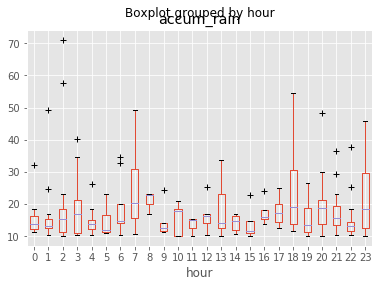

In [74]:
event_occurences = pd.DataFrame(charlotte_1h_exceeds)
event_occurences['hour'] = event_occurences.index.hour
event_occurences.boxplot(column=['accum_rain'], by='hour', sym='+')

Number of occurences per hour

In [75]:
event_occurences.hour.value_counts(sort=False)

0     16
1     13
2     15
3     15
4     11
5      5
6      9
7     10
8      3
9      5
10     5
11     3
12     5
13     7
14     6
15     4
16     4
17     6
18     8
19    13
20     9
21    14
22    15
23    14
Name: hour, dtype: int64

In [76]:
# plt.plot(asd.hour.value_counts(sort=False))

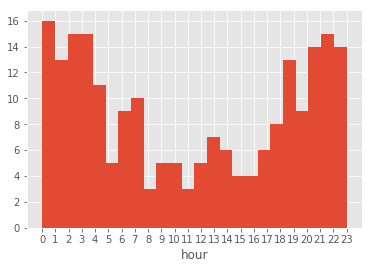

In [77]:
cur_hist = plt.hist(event_occurences.hour, bins=24, histtype='stepfilled')
plt.xticks(range(24))
plt.xlabel('hour')